In [19]:

import pandas as pd

# ** Regression with keras**

# Preparing data

In [6]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
concrete_data.shape

(1030, 9)

In [9]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [12]:
#Split data into predictors and target
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column


In [13]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [14]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [15]:
#normalizing the data

predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [16]:
n_cols = predictors_norm.shape[1] # number of predictors

# Building our Neural Network

In [17]:
import keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# our model has two hidden layers, each of 50 hidden units.
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [22]:
model = regression_model()

In [23]:
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 1s - loss: 1607.7705 - val_loss: 1117.7407 - 1s/epoch - 49ms/step
Epoch 2/100
23/23 - 0s - loss: 1440.8589 - val_loss: 974.2015 - 83ms/epoch - 4ms/step
Epoch 3/100
23/23 - 0s - loss: 1176.1024 - val_loss: 759.1655 - 77ms/epoch - 3ms/step
Epoch 4/100
23/23 - 0s - loss: 816.1658 - val_loss: 517.8636 - 85ms/epoch - 4ms/step
Epoch 5/100
23/23 - 0s - loss: 486.7296 - val_loss: 324.7670 - 80ms/epoch - 3ms/step
Epoch 6/100
23/23 - 0s - loss: 307.4398 - val_loss: 235.0772 - 92ms/epoch - 4ms/step
Epoch 7/100
23/23 - 0s - loss: 249.0561 - val_loss: 203.4537 - 86ms/epoch - 4ms/step
Epoch 8/100
23/23 - 0s - loss: 227.1653 - val_loss: 185.0583 - 89ms/epoch - 4ms/step
Epoch 9/100
23/23 - 0s - loss: 210.0047 - val_loss: 183.5227 - 86ms/epoch - 4ms/step
Epoch 10/100
23/23 - 0s - loss: 199.6248 - val_loss: 179.0742 - 97ms/epoch - 4ms/step
Epoch 11/100
23/23 - 0s - loss: 191.2413 - val_loss: 172.4407 - 82ms/epoch - 4ms/step
Epoch 12/100
23/23 - 0s - loss: 185.1977 - val_loss: 171.933

# **Classification with keras**

In [24]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [25]:
import matplotlib.pyplot as plt

In [26]:
#data
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [27]:
X_train.shape

(60000, 28, 28)

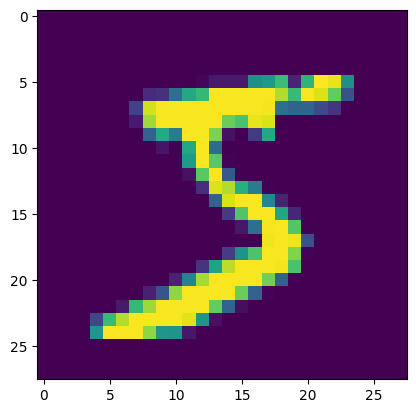

In [28]:
plt.imshow(X_train[0])

In [29]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [30]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [31]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


# building neural network

In [32]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 21s - loss: 0.1873 - accuracy: 0.9429 - val_loss: 0.1050 - val_accuracy: 0.9687 - 21s/epoch - 11ms/step
Epoch 2/10
1875/1875 - 19s - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.1025 - val_accuracy: 0.9681 - 19s/epoch - 10ms/step
Epoch 3/10
1875/1875 - 21s - loss: 0.0524 - accuracy: 0.9833 - val_loss: 0.0864 - val_accuracy: 0.9758 - 21s/epoch - 11ms/step
Epoch 4/10
1875/1875 - 20s - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0607 - val_accuracy: 0.9806 - 20s/epoch - 11ms/step
Epoch 5/10
1875/1875 - 19s - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0686 - val_accuracy: 0.9807 - 19s/epoch - 10ms/step
Epoch 6/10
1875/1875 - 20s - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0729 - val_accuracy: 0.9810 - 20s/epoch - 11ms/step
Epoch 7/10
1875/1875 - 20s - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0777 - val_accuracy: 0.9817 - 20s/epoch - 11ms/step
Epoch 8/10
1875/1875 - 20s - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0985 - val_accuracy: 0.9792 - 20s/ep

In [34]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9801999926567078% 
 Error: 0.019800007343292236


In [35]:
model.save('classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
from keras.models import load_model

In [37]:
pretrained_model = load_model('classification_model.h5')